# Decision Tree Regression - Home Sales Prediction

* Project Scope: Analyze,Visualize and apply Decision Tree Regression model to predict Home sales based on 19 house features
* Data source: [Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction) (19 house features plus the price and the id columns, along with 21613 observations.)
* Columns
    * id: a notation for a house
    * date: Date house was sold
    * price: Price is prediction target
    * bedrooms: Number of Bedrooms/House
    * bathrooms: Number of bathrooms/bedrooms
    * sqft_living: square footage of the home
    * sqft_lot: square footage of the lot
    * floors: Total floors (levels) in house
    * waterfront: House which has a view to a waterfront
    * view: Has been viewed
    * condition: How good the condition is ( Overall )
    * grade: overall grade given to the housing unit, based on King County grading system
    * sqft_above: square footage of house apart from basement
    * sqft_basement: square footage of the basement
    * yr_built: Built Year
    * yr_renovated: Year when house was renovated
    * zipcode: zip
    * latLatitude: coordinate
    * longLongitude: coordinate
    * sqft_living15: Living room area in 2015(implies--some renovations)This might or might not have affected the lotsize area
    * sqft_lot15: lotSize area in 2015(implies-- some renovations)

## Import libraries & Load data

In [1]:
# Import Data Analysis libraries
import pandas as pd
import numpy as np

# Import Data Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For display in notebook
%matplotlib inline

# Load US housig data
dataset = pd.read_csv('kc_house_data.csv')

## Lets check the data

In [2]:
# let check information in the CSV file
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


* We can see there are 21 Columns and its datatypes:
* Out of 21 columns, 19 are input variables/features (X), 1 output /target variable (y), 1 id column
* There are 21613  training examples (m)

In [3]:
# Checking for null columns
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

we see that there are no null data in any columns

In [4]:
# lets check the data
dataset.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Data in this data set is self explanatory

In [5]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


this gives descriptive statistics that sumarize the central tendency of numarical columns

## Let's analyze and visualize data

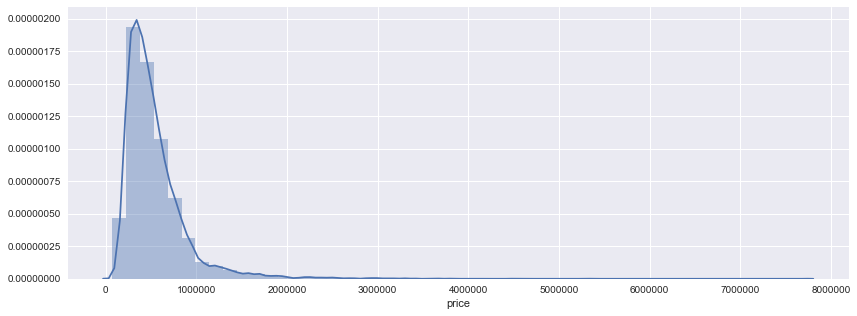

In [6]:
plt.figure(figsize=(14,5))
sns.distplot(dataset['price'])
plt.show()

In [7]:
dataset['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

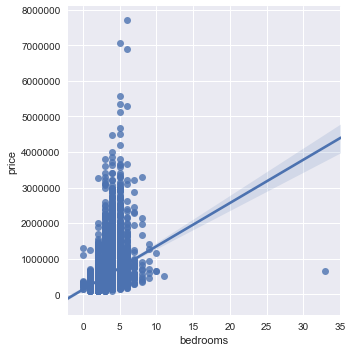

In [8]:
sns.lmplot(x='bedrooms', y='price',data=dataset)

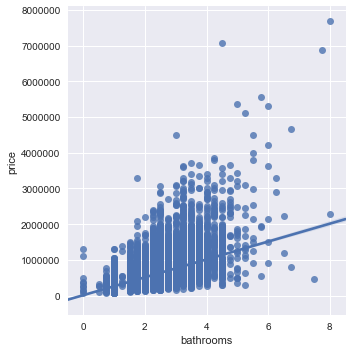

In [9]:
sns.lmplot(x='bathrooms', y='price',data=dataset)

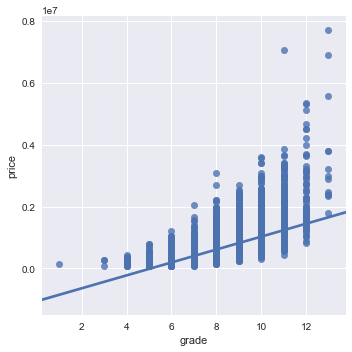

In [10]:
sns.lmplot(x='grade', y='price',data=dataset)

In [11]:
dataset['yr_built'].value_counts().head(5)

2014    559
2006    454
2005    450
2004    433
2003    422
Name: yr_built, dtype: int64

<function matplotlib.pyplot.show>

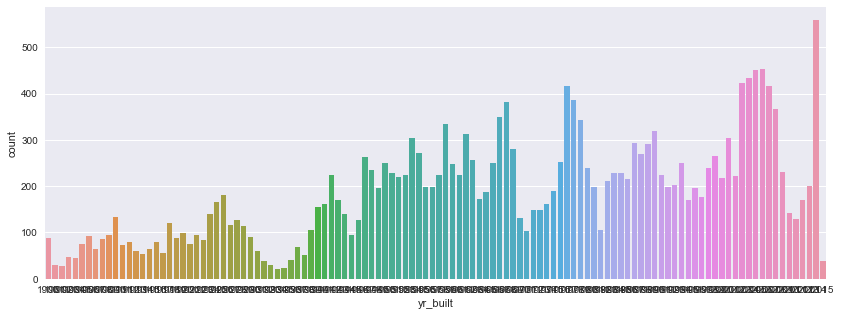

In [12]:
plt.figure(figsize=(14,5))
sns.countplot('yr_built',data=dataset) #, hue='reason',palette='Set2', order=order_d)
plt.show

In [13]:
dataset['zipcode'].value_counts().head(5)

98103    602
98038    590
98115    583
98052    574
98117    553
Name: zipcode, dtype: int64

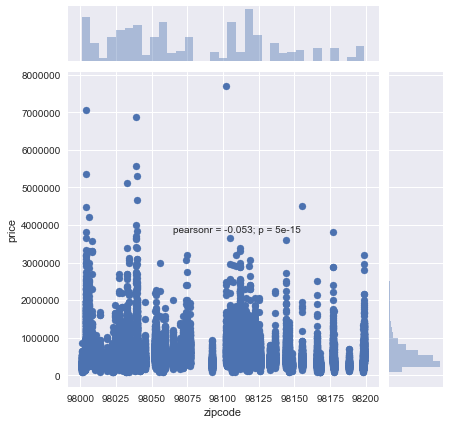

In [14]:
plt.figure(figsize=(14,5))
sns.jointplot(x='zipcode', y='price',data=dataset, kind='scatter')
plt.show()

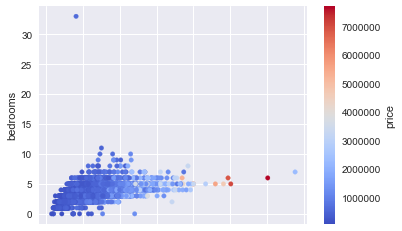

In [15]:
plt.figure(figsize=(14,6))
dataset.plot.scatter(x='sqft_living', y='bedrooms', c='price', cmap ='coolwarm')
plt.show()

## Spliting data into input and output variables

In [16]:
X = dataset[['bedrooms','bathrooms','sqft_living', 'sqft_lot', 'floors','waterfront','view',
             'condition','grade','sqft_above', 'sqft_basement','yr_built','yr_renovated','zipcode',
            'lat','long']]
y = dataset[['price']]

In [17]:
X.shape

(21613, 16)

In [18]:
y.shape

(21613, 1)

## Splitting the dataset into the Training set and Test set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

for item in [X_train, y_train, X_test, y_test]:
    print(item.shape)

(15129, 16)
(15129, 1)
(6484, 16)
(6484, 1)


## Fitting Decision Tree Regression & Evaluating the model

In [20]:
# Importing models
from sklearn.tree import DecisionTreeRegressor

# Importing metrics module
from sklearn import metrics

    
# creating Decision Tree regression model and fitting with data 
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

# predicting on training data-set
y_train_pred = regressor.predict(X_train)

#predicting the Test results
y_test_pred = regressor.predict(X_test)

# evaluating the model on training dataset
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
r2_train = metrics.r2_score(y_train, y_train_pred)

# evaluating the model on test dataset
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2_test = metrics.r2_score(y_test, y_test_pred)

print("The model performance for the training set")
print("-------------------------------------------")
print("Root Mean Squared Error of training set is {}".format(rmse_train))
print("R Squared score of training set is {}".format(r2_train))
    
print("\n")
  
print("The model performance for the test set")
print("-------------------------------------------")
print("Root Mean Squared Error of test set is {}".format(rmse_test))
print("R Squared score score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
Root Mean Squared Error of training set is 8780.893790075948
R Squared score of training set is 0.9994532224870716


The model performance for the test set
-------------------------------------------
Root Mean Squared Error of test set is 165222.9205653972
R Squared score score of test set is 0.7729223787421335


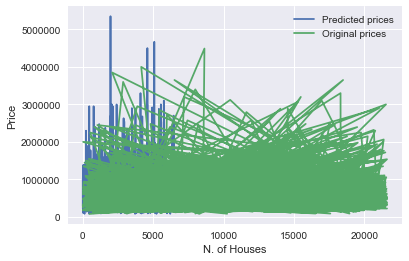

In [21]:
plt.plot(y_test_pred, label='Predicted prices')
plt.plot(y_test, label='Original prices')
plt.legend()
plt.xlabel('N. of Houses')
plt.ylabel('Price')
plt.show()

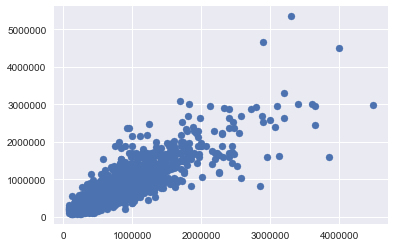

In [22]:
plt.scatter(y_test,y_test_pred)
plt.show()

In [23]:
print( 'MAE:  ', metrics.mean_absolute_error(y_test, y_test_pred))
print( 'MSE:  ', metrics.mean_squared_error(y_test, y_test_pred))
print( 'RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print( 'R2:', metrics.r2_score(y_test, y_test_pred))

MAE:   94844.78932757558
MSE:   27298613480.159546
RMSE:  165222.9205653972
R2: 0.7729223787421335


In [33]:
# Feature Importances
Feature_imp = pd.DataFrame(regressor.feature_importances_*100 ,X.columns,columns=['Feature Importances'])
Feature_imp

,Feature Importances
bedrooms,0.518195
bathrooms,1.037880
sqft_living,25.297231
sqft_lot,2.699424
floors,0.147539
waterfront,3.344308
view,0.961605
condition,0.298022
grade,36.171540
sqft_above,1.727320


In [60]:
from matplotlib.gridspec import GridSpec

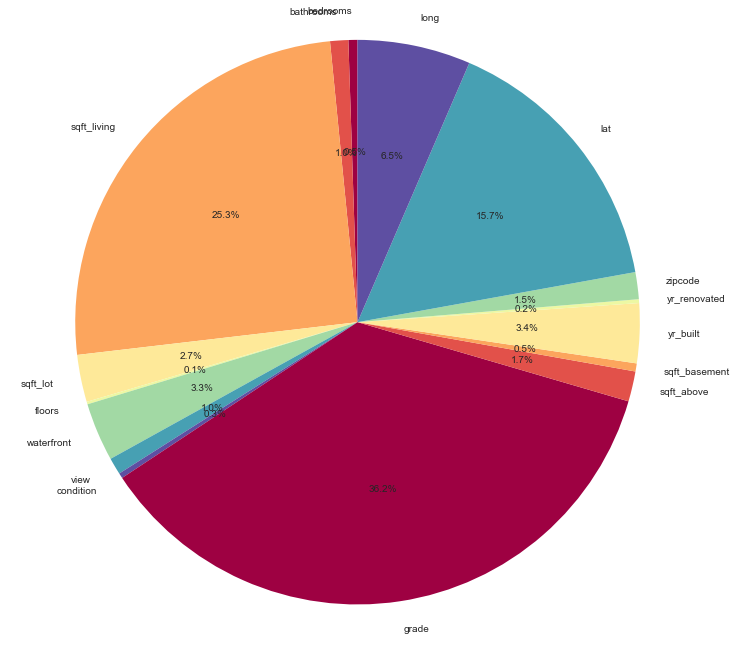

In [71]:
fig1, ax1 = plt.subplots(figsize=(10, 9))
fig1.subplots_adjust(0.1,0,1,1)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
ax1.pie(Feature_imp.values, colors = colors,labels=Feature_imp.index, autopct='%1.1f%%',
        shadow=False, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

To conclude our model got 77% accuracy in predecitng the outcome. And grade, sqft_living are the two most important inputs for predecting the output